---



**(a) Load a dataset containing student marks in 4 subjects. Normalize the data and apply KMeans clustering to group students based on performance.**
---


---



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [28]:
#loading dataset
df = pd.read_csv("/content/drive/MyDrive/DataVisualization_4th_sem/LabPracticals/LAB2/Example_csv.csv")
df.head(3)

,Student,Math,Physics,Chemistry,Biology
0,Aarav,78,74,80,82
1,Aditi,65,68,70,72
2,Akash,90,88,92,91


In [29]:
# Normalize the data
nor_df=df.copy()
nor_df

,Student,Math,Physics,Chemistry,Biology
0,Aarav,78,74,80,82
1,Aditi,65,68,70,72
2,Akash,90,88,92,91
3,Ananya,55,60,58,62
4,Arjun,82,79,85,87
...,...,...,...,...,...
67,Heena,58,60,59,61
68,Imran,90,88,91,92
69,Jhanvi,73,71,74,75
70,Keshav,65,67,66,68


In [31]:
for col in range(1,len(nor_df.iloc[0,:])):
    #min-max Normalization
    max_col=np.max(nor_df.iloc[:,col])
    min_col=np.min(nor_df.iloc[:,col])
    for i in range(len(nor_df.iloc[:,col])):
        nor_df.iloc[i,col]=(float(nor_df.iloc[i,col]-min_col))/(float(max_col-min_col))
nor_df

,Student,Math,Physics,Chemistry,Biology
0,Aarav,0.560976,0.444444,0.564103,0.578947
1,Aditi,0.243902,0.277778,0.307692,0.315789
2,Akash,0.853659,0.833333,0.871795,0.815789
3,Ananya,0.000000,0.055556,0.000000,0.052632
4,Arjun,0.658537,0.583333,0.692308,0.710526
...,...,...,...,...,...
67,Heena,0.073171,0.055556,0.025641,0.026316
68,Imran,0.853659,0.833333,0.846154,0.842105
69,Jhanvi,0.439024,0.361111,0.410256,0.394737
70,Keshav,0.243902,0.250000,0.205128,0.210526


In [32]:
#apply KMeans clustering
#Train clustering models
kmeans=KMeans( n_clusters=3, init='k-means++', max_iter=3000, random_state=72)
kmeans

KMeans(max_iter=3000, n_clusters=3, random_state=72)

In [33]:
kmeans.fit(nor_df.iloc[:,1:])
nor_df["cluster"]=kmeans.predict(nor_df.iloc[:,1:])
nor_df

,Student,Math,Physics,Chemistry,Biology,cluster
0,Aarav,0.560976,0.444444,0.564103,0.578947,2
1,Aditi,0.243902,0.277778,0.307692,0.315789,0
2,Akash,0.853659,0.833333,0.871795,0.815789,1
3,Ananya,0.000000,0.055556,0.000000,0.052632,0
4,Arjun,0.658537,0.583333,0.692308,0.710526,1
...,...,...,...,...,...,...
67,Heena,0.073171,0.055556,0.025641,0.026316,0
68,Imran,0.853659,0.833333,0.846154,0.842105,1
69,Jhanvi,0.439024,0.361111,0.410256,0.394737,2
70,Keshav,0.243902,0.250000,0.205128,0.210526,0


In [34]:
#Visualize clusters using PCA
from sklearn.decomposition import PCA

In [35]:
pca=PCA(n_components=2)
nor_df[["pc1","pc2"]]=pca.fit_transform(nor_df.iloc[:,1:5])
nor_df.head(3)

,Student,Math,Physics,Chemistry,Biology,cluster,pc1,pc2
0,Aarav,0.560976,0.444444,0.564103,0.578947,2,0.049750,-0.104977
1,Aditi,0.243902,0.277778,0.307692,0.315789,0,-0.452647,-0.037526
2,Akash,0.853659,0.833333,0.871795,0.815789,1,0.661412,0.002500


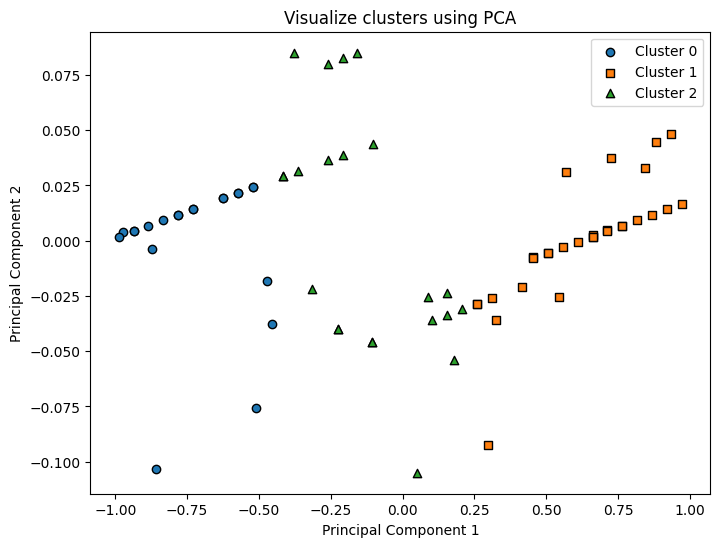

In [36]:
markers = {0: 'o', 1: 's', 2: '^'}
plt.figure(figsize=(8,6))
for cluster_id in [0, 1, 2]:
    subset = nor_df[nor_df["cluster"] == cluster_id]
    plt.scatter(
        subset["pc1"],
        subset["pc2"],
        marker=markers[cluster_id],
        edgecolor='k',
        label=f"Cluster {cluster_id}"
    )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Visualize clusters using PCA")
plt.legend()
plt.show()

---



**(b)Load a dataset of employees with categorical and numerical features,  encode the categorical data and train a decision tree to predict job satisfaction.**
---


---


In [71]:
#Load a dataset of employees
df = pd.read_csv("/content/drive/MyDrive/DataVisualization_4th_sem/LabPracticals/LAB2/data.csv")
df=pd.DataFrame(df)
df.drop(columns=["ID"],axis=1,inplace=True)

In [72]:
df.head(3)

,Department,Gender,Age,Salary,Satisfaction_Level
0,Marketing,Female,22,75891,High
1,HR,Female,43,85026,Medium
2,Sales,Male,34,44650,Medium


In [73]:
#One-hot encoding Department.
df=pd.get_dummies(df,columns=["Department"],drop_first=False)
df.head(3)

,Gender,Age,Salary,Satisfaction_Level,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Sales
0,Female,22,75891,High,False,False,False,True,False
1,Female,43,85026,Medium,False,True,False,False,False
2,Male,34,44650,Medium,False,False,False,False,True


In [74]:
#One-hot encoding Gender.
df=pd.get_dummies(df,columns=["Gender"],drop_first=False)
df.head(3)

,Age,Salary,Satisfaction_Level,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Sales,Gender_Female,Gender_Male
0,22,75891,High,False,False,False,True,False,True,False
1,43,85026,Medium,False,True,False,False,False,True,False
2,34,44650,Medium,False,False,False,False,True,False,True


In [75]:
df.iloc[1,:]

,1
Age,43
Salary,85026
Satisfaction_Level,Medium
Department_Finance,False
Department_HR,True
Department_IT,False
Department_Marketing,False
Department_Sales,False
Gender_Female,True
Gender_Male,False


In [76]:
#encoding satisfaction feature
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder(categories=[["Low", "Medium", "High"]])
df["Satisfaction_Level"] = ordinal.fit_transform(df[["Satisfaction_Level"]])
df.head(3)

,Age,Salary,Satisfaction_Level,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Sales,Gender_Female,Gender_Male
0,22,75891,2.0,False,False,False,True,False,True,False
1,43,85026,1.0,False,True,False,False,False,True,False
2,34,44650,1.0,False,False,False,False,True,False,True


In [77]:
#Split Dataset into X and y
X = df.drop("Satisfaction_Level", axis=1)
X = X.astype(int)
y = df["Satisfaction_Level"]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (40, 9)
y shape: (40,)


In [78]:
X.head(4)

,Age,Salary,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Sales,Gender_Female,Gender_Male
0,22,75891,0,0,0,1,0,1,0
1,43,85026,0,1,0,0,0,1,0
2,34,44650,0,0,0,0,1,0,1
3,59,46921,0,0,0,0,1,1,0


In [79]:
#train-test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split( X, y, test_size=0.3, random_state=72)

In [80]:
xtrain.head(3)

,Age,Salary,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Sales,Gender_Female,Gender_Male
9,39,82000,1,0,0,0,0,1,0
3,59,46921,0,0,0,0,1,1,0
18,53,73000,0,0,0,1,0,0,1


In [81]:
#Normalize numerical ones if needed.
num_cols = ["Age", "Salary"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain[num_cols] = scaler.fit_transform(xtrain[num_cols])
xtest[num_cols] = scaler.transform(xtest[num_cols])


In [82]:
xtrain.head(3)

,Age,Salary,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Sales,Gender_Female,Gender_Male
9,-0.018631,1.143879,1,0,0,0,0,1,0
3,2.068090,-0.709180,0,0,0,0,1,1,0
18,1.442074,0.668451,0,0,0,1,0,0,1


In [83]:
ytrain.head(3)

,Satisfaction_Level
9,2.0
3,0.0
18,2.0


In [89]:
#Train a Decision Tree classifier.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [87]:
dt= DecisionTreeClassifier(random_state=72)
dt

DecisionTreeClassifier(random_state=72)

In [88]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=72)

In [91]:
#Print accuracy on train data.
ytrain_pred=dt.predict(xtrain)
print("Decision Tree Accuracy(Training):", accuracy_score(ytrain,ytrain_pred))

Decision Tree Accuracy(Training): 1.0


In [92]:
#Print accuracy on test data.
ytest_pred=dt.predict(xtest)
print("Decision Tree Accuracy(Test):", accuracy_score(ytest,ytest_pred))

Decision Tree Accuracy(Test): 0.3333333333333333


---

---
**Learning Outcome**
---

---
    Learned how to normalize student performance data
    and apply KMeans  clustering with PCA visualization
    to group students based on academic marks.

    Understood how to encode categorical employee
    features and train a Decision Tree model to predict
    job satisfaction with accuracy evaluation.


---
